<a href="https://colab.research.google.com/github/Harshobhit/Hands-On_Recurrent-Neural-Networks/blob/main/AutoRegressiveLinearModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install -q tensorflow-gpu

In [35]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [36]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

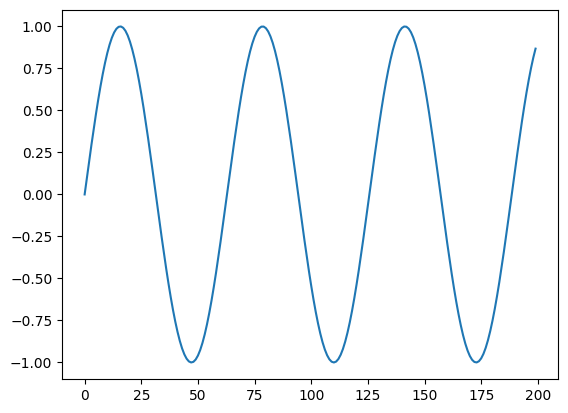

In [37]:
# Make the original data
series = np.sin(0.1 * np.arange(200))

plt.plot(series)
plt.show()

In [38]:
# Build the dataset
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)


X.shape (190, 10) Y.shape (190,)


In [42]:
# autoregressive model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1)
)

# Train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)


Epoch 1/80


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/3 [=========>....................] - ETA: 4s - loss: 1.6535

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - 3s 475ms/step - loss: 0.8732 - val_loss: 0.5229
Epoch 2/80
3/3 [==============================] - 0s 136ms/step - loss: 0.5209 - val_loss: 0.2980
Epoch 3/80
3/3 [==============================] - 0s 134ms/step - loss: 0.1515 - val_loss: 0.1600
Epoch 4/80
3/3 [==============================] - 0s 105ms/step - loss: 0.1807 - val_loss: 0.0654
Epoch 5/80
3/3 [==============================] - 0s 81ms/step - loss: 0.0376 - val_loss: 0.0282
Epoch 6/80
3/3 [==============================] - 0s 71ms/step - loss: 0.0420 - val_loss: 0.0506
Epoch 7/80
3/3 [==============================] - 0s 87ms/step - loss: 0.0450 - va

In [40]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


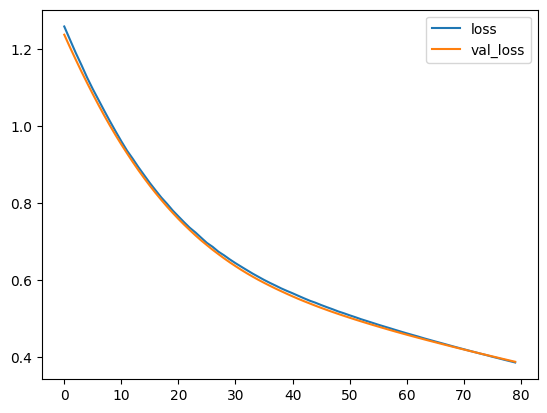

In [41]:
# Plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()


In [43]:
# Forecast future values
validation_target = Y[-N//2:]
validation_predictions = []

# Last train input
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0] # 1x1 array

  # Update predictions list
  validation_predictions.append(p)

  # Make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 19ms/step


In [44]:
x_t = np.arange(10)
np.roll(x_t,-2)

array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1])

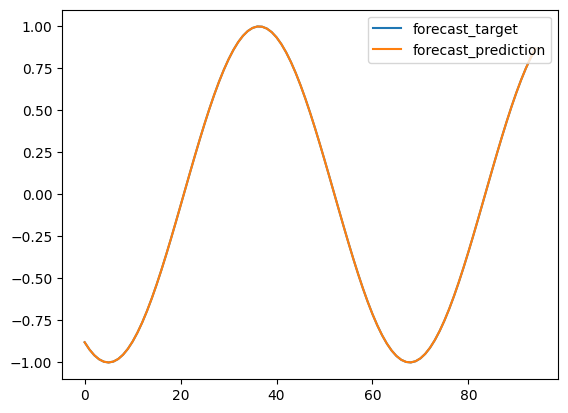

In [45]:
plt.plot(validation_target, label="forecast_target")
plt.plot(validation_predictions, label="forecast_prediction")
plt.legend()